## 1. eigene Bilddaten als Array einlesen 
2. jpeg- oder png-werte in rgb-pixelwerte umwandeln
3. Konvertieren des Arrays in eine Liste (oder bei CNN's in Tensoren) 
4. Skalieren der Pixelwerte mit dem Faktor 1/255, 
    d.h. aus einem Bereich von
    0-255
    in
    0-1
    z.B. (34 / 255.0 * 0.99) + 0.01

### 1.1. z.B. eigenes png-Bild

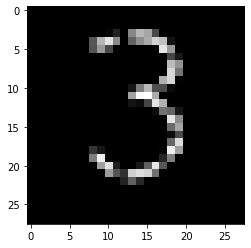

In [2]:
import imageio
import matplotlib.pyplot

# Bilddaten von *.png in Array laden
img_array = imageio.imread('data/2828_my_own_3.png', as_gray=True)

#Windows User
#img_array = imageio.imread('C:/Users/unsername/Desktop/imagefolder/2828_my_own_3.png', as_gray=True)
# Bild anzeigen
matplotlib.pyplot.imshow(img_array,cmap='Greys', interpolation='None')
# oder bei jpeg, oder png
#import scipy.misc
#img_array = scipy.misc.imread('2828_my_own_image.png', flatten=True)

In [3]:
# von 28x28_Array in eine Liste mit 784 Werten
# Werte umkehren ...warum hab ich das nochmal gemacht?
img_data  = 255.0 - img_array.reshape(28*28)

In [4]:
import numpy   
# Skalieren in einen Werteberiech von 0.01 bis 1.0
img_data = (img_data / 255.0 * 0.99) + 0.01
print("min = ", numpy.min(img_data))
print("max = ", numpy.max(img_data))

min =  0.01
max =  1.0


----

### 1.2. z.B. von einer Trainings- bzw. Testdatenbank

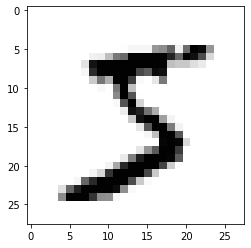

In [5]:
import numpy
#import urllib2
import matplotlib.pyplot
%matplotlib inline
# https://github.com/makeyourownneuralnetwork/makeyourownneuralnetwork/blob/master/mnist_dataset/mnist_train_100.csv

#Datei einlesen und ausgeben, 'r'=readonly
data_file = open("data/mnist_train_100.csv", 'r')
data_list = data_file.readlines()
##Datei wieder schließen um resourcen zu sparen
data_file.close

#string in liste (mit 784 elementen) umwandeln
all_values = data_list[0].split(',')
#1. Textstring in Zahlen konvertieren
#2. alle zahlen verwenden außer die erste (ist die kennung), danach
#3. alle 28 elemente ein linebreak << ergibt 28x28-matrix
image_array = numpy.asfarray(all_values[1:]).reshape((28,28))
#visualisierung des arrays in graustufen
matplotlib.pyplot.imshow(image_array,cmap='Greys', interpolation='None')


----

## 2. Eigene Testdatenbank erstellen

loading ...  data/2828_my_own_3.png
0.01
1.0
loading ...  data/2828_my_own_6.png
0.01
1.0
loading ...  data/2828_my_own_4.png
0.01
0.93011767
loading ...  data/2828_my_own_5.png
0.01
0.86800003
loading ...  data/2828_my_own_2.png
0.01
1.0


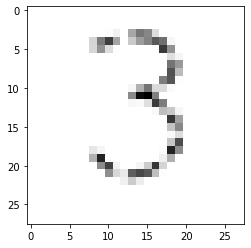

In [6]:
# glob helps select multiple files using patterns
import glob
import numpy
#import urllib2
import matplotlib.pyplot
%matplotlib inline

# eigene testdatenbank
our_own_dataset = []

# png's als datenbank laden
for image_file_name in glob.glob('data/2828_my_own_?.png'):
    
    # filename zum labeling benutzen (platzhalter ?)
    label = int(image_file_name[-5:-4])
    
    # Bilddaten von png in array
    print ("loading ... ", image_file_name)
    img_array = imageio.imread(image_file_name, as_gray=True)
    
    # von 28x28 zu 784er liste
    img_data  = 255.0 - img_array.reshape(784)
    
    # skalieren von 0.01 zu 1.0
    img_data = (img_data / 255.0 * 0.99) + 0.01
    print(numpy.min(img_data))
    print(numpy.max(img_data))
    
    # labels und skalierte Bilddaten in datenbank einbinden
    record = numpy.append(label,img_data)
    our_own_dataset.append(record)
    
    pass

# auswahl treffen
item = 0

# als liste darstellen:
#print(our_own_dataset[item])

#grafisch darstellen
matplotlib.pyplot.imshow(our_own_dataset[item][1:].reshape(28,28), cmap='Greys', interpolation='None')



## Vorgefertigte Datasets

In [7]:
# Importing Necessary Libraries
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20.0, 10.0)

# Reading Data
data = pd.read_csv('data/headbrain.csv')
print(data.shape)
#data.head()
data.tail()

(237, 4)


,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
232,2,2,3214,1110
233,2,2,3394,1215
234,2,2,3233,1104
235,2,2,3352,1170
236,2,2,3391,1120
